# Compute and compare different networks to "Hierarchical Framework for Leaf Instance Segmentation"

In [42]:
from argparse import Namespace
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from compute_scores import compute_scores

### Set the default value to run the script

- result_path: is the detected area from the networks
- gt_path: is the ground truth annotation area
- score: is the prediction probabilities default is 0.5
- write: is used to write results in a file

In [43]:
validation = "../dataset/annotations/MSU-PID/validation300.json"

results = [
    "/data/basile/Project/AdelaiDet/training_dir/blendmask_R101_dcn_ppd/inference/coco_instances_results.json",
    "/data/basile/Project/AdelaiDet/training_dir/solo_R_101_ppd/inference/coco_instances_results.json", # devo mettere quello calcolato
    "/data/basile/Project/instance_computation/results/MMPPD_yolact_base_results.json",
    "/data/basile/Project/instance_computation/results/MMPPD_yolact_plus_results.json"
]

In [44]:
result_list = []
for element in results:
    buff = element.split("/")[-1]
    print(f"analyzing {buff}")
    args = Namespace(result_path    = element,
                     gt_path        = validation,
                     score          = 0.5,
                     write          = False)

    sbd, dice = compute_scores(args)
    result_list.append([sbd,dice])

analyzing coco_instances_results.json
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loaded data

Data Prepared for computation
Total element to analyze: 846
Total element inside the images 609

Starting computing Scores



Symmetric Dice: 100%|##########| 609/609 [00:01<00:00, 520.50it/s]


analyzing coco_instances_results.json
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loaded data

Data Prepared for computation
Total element to analyze: 166
Total element inside the images 609

Starting computing Scores



Symmetric Dice: 100%|##########| 609/609 [00:00<00:00, 2210.35it/s]


analyzing MMPPD_yolact_base_results.json
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loaded data

Data Prepared for computation
Total element to analyze: 2463
Total element inside the images 609

Starting computing Scores



Symmetric Dice: 100%|##########| 609/609 [00:01<00:00, 473.21it/s]


analyzing MMPPD_yolact_plus_results.json
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loaded data

Data Prepared for computation
Total element to analyze: 2466
Total element inside the images 609

Starting computing Scores



Symmetric Dice: 100%|##########| 609/609 [00:01<00:00, 459.00it/s]


Put the results to the percentage

### Set the result to a dataframe

### Computed results are Symmetric Best Dice and the Dice score 

In [45]:
result_list = np.array(result_list)

result_list = np.append(result_list, [0.747, 0.899]).reshape((-1, 2))

result_list *= 100
data = pd.DataFrame(
    result_list, 
    columns=["SBD", "Dice"], 
    index=["BlendMask", "SOLOv2", "Yolact", "Yolact plus", "slice random walk"])

print(data)

                         SBD       Dice
BlendMask          72.089732  55.802143
SOLOv2             64.517152  75.449734
Yolact             62.050720  19.177109
Yolact plus        59.272629  19.266941
slice random walk  74.700000  89.900000


<AxesSubplot:>

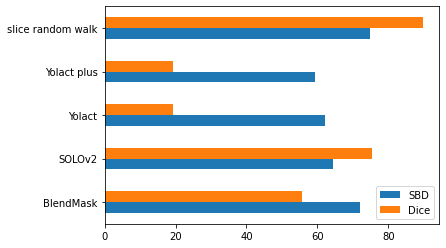

In [46]:
data.plot.barh(ylim=(0,100))

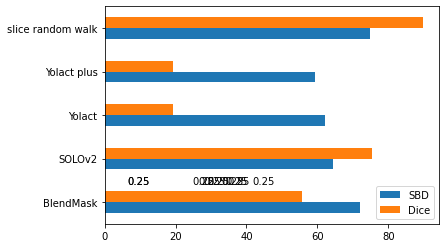

In [47]:
ax = data.plot(kind='barh', ylim=(0,100)) 
# for ay in ax:
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [48]:
komatsuna_validation = "/data/basile/Project/AdelaiDet/datasets/coco/annotations/validation900.json"

komatsuna_results = [
    "/data/basile/Project/AdelaiDet/training_dir/blendmask_R_101_dcn_5x_4/inference/coco_instances_results.json",
    "/data/basile/Project/AdelaiDet/training_dir/solo_R_101_3x_2/inference/coco_instances_results.json",
    "/data/basile/Project/instance_computation/results/yolact_komatsuna.json",
    "/data/basile/Project/instance_computation/results/yolact_plus_komatsuna.json"
]

In [49]:
komatsuna_result_list = []
for element in komatsuna_results:
    buff = element.split("/")[-1]
    print(f"analyzing {buff}")
    args = Namespace(result_path    = element,
                     gt_path        = komatsuna_validation,
                     score          = 0.8,
                     write          = False)

    sbd, dice = compute_scores(args)
    komatsuna_result_list.append([sbd,dice])

analyzing coco_instances_results.json
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Loaded data

Data Prepared for computation
Total element to analyze: 3418
Total element inside the images 3778

Starting computing Scores



Symmetric Dice: 100%|##########| 3778/3778 [00:07<00:00, 479.68it/s]


analyzing coco_instances_results.json
loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
Loaded data

Data Prepared for computation
Total element to analyze: 3026
Total element inside the images 3778

Starting computing Scores



Symmetric Dice: 100%|##########| 3778/3778 [00:06<00:00, 544.39it/s]


analyzing yolact_komatsuna.json
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Loaded data

Data Prepared for computation
Total element to analyze: 4307
Total element inside the images 3778

Starting computing Scores



Symmetric Dice: 100%|##########| 3778/3778 [00:09<00:00, 379.34it/s]


analyzing yolact_plus_komatsuna.json
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Loaded data

Data Prepared for computation
Total element to analyze: 4325
Total element inside the images 3778

Starting computing Scores



Symmetric Dice: 100%|##########| 3778/3778 [00:09<00:00, 379.10it/s]


In [50]:
komatsuna_result_list = np.array(komatsuna_result_list)

komatsuna_result_list = np.append(komatsuna_result_list, [0.747,0.899]).reshape((-1, 2))

komatsuna_result_list *= 100
komatsuna_data = pd.DataFrame(
    komatsuna_result_list, 
    columns=["SBD", "Dice"], 
    index=["BlendMask", "SOLOv2", "Yolact", "Yolact plus", "slice random walk"])

print(komatsuna_data)

                         SBD       Dice
BlendMask          88.999020  92.117460
SOLOv2             87.045715  95.355122
Yolact             85.341699  80.787106
Yolact plus        83.781623  79.855406
slice random walk  74.700000  89.900000


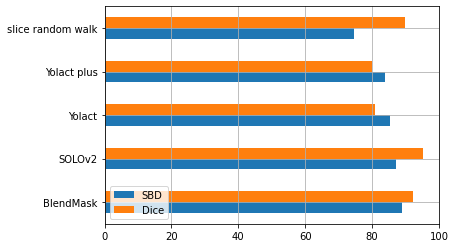

In [51]:
# ax = komatsuna_data.plot(kind='bar', ylim=(0,100))
# ax.legend(loc=3)
# for p in ax.patches:
#     ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax = komatsuna_data.plot.barh(ylim=(0,100), grid=True)
ax.legend(loc=3)